In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [47]:
all_data = pd.read_feather(r'C:\Users\User\Documents\GitHub\Data_Analytics_Projects-\Sales Analytics\Sales+Analysis\Sales_data.ftr')
all_data.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [48]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [49]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [50]:
all_data.shape

(186850, 6)

In [51]:
all_data.dropna(how='all', inplace = True)

In [52]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [53]:
all_data.duplicated().sum()

np.int64(618)

In [54]:
all_data.drop_duplicates(inplace = True)

In [55]:
all_data.duplicated().sum()

np.int64(0)

In [58]:
all_data.shape

(185687, 6)

In [59]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [60]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [61]:
all_data['Order Date'][0]

'04/19/19 08:46'

In [62]:
int(all_data['Order Date'][0].split('/')[0])

4

In [63]:
def return_month(x):
    return x.split('/')[0]

In [64]:
all_data['Month'] = all_data['Order Date'].apply(return_month)

In [65]:
all_data['Month'] = all_data['Month'].astype(int)

ValueError: invalid literal for int() with base 10: 'Order Date'

In [66]:
all_data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [67]:
filter1 = all_data['Month'] == 'Order Date'

In [68]:
all_data[~filter1]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [69]:
all_data = all_data[~filter1]

In [70]:
all_data.shape

(185686, 7)

In [73]:
all_data['Month'] = all_data['Month'].astype(int)
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)

In [74]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']

In [75]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [76]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
dtype: object

In [80]:
df_month_sales = all_data.groupby(['Month'])['Sales'].sum()

In [93]:
df_month_sales = df_month_sales.reset_index()

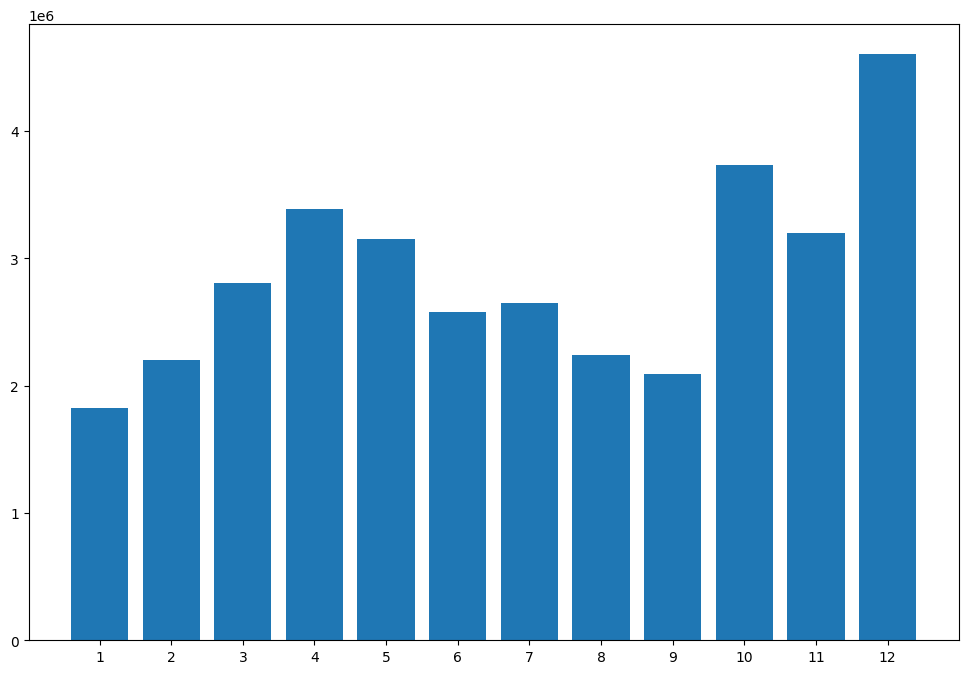

In [97]:
plt.figure(figsize=(12,8))
plt.bar(df_month_sales['Month'], df_month_sales['Sales'])
plt.xticks(ticks=range(1, 13))
plt.show()

In [98]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
dtype: object

In [99]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99


In [102]:
all_data['Purchase Address'][2]

'682 Chestnut St, Boston, MA 02215'

In [103]:
def get_city(x):
    return x.split(',')[1]

In [105]:
all_data['City'] = all_data['Purchase Address'].apply(get_city)

In [106]:
all_data['City']

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: City, Length: 185686, dtype: object

In [110]:
df_orders_city = all_data.value_counts(all_data['City'])
df_orders_city

City
San Francisco    44662
Los Angeles      29564
New York City    24847
Boston           19901
Atlanta          14863
Dallas           14797
Seattle          14713
Portland         12449
Austin            9890
Name: count, dtype: int64

<Axes: ylabel='count'>

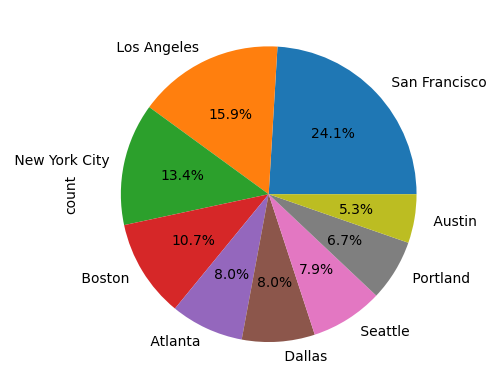

In [118]:
df_orders_city.plot(kind='pie', autopct = '%1.1f%%')

In [119]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City'],
      dtype='object')

In [123]:
count_df = all_data.groupby(['Product']).agg({'Quantity Ordered': 'sum','Price Each': 'mean'}).reset_index()
count_df

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126,109.99
1,27in 4K Gaming Monitor,6239,389.99
2,27in FHD Monitor,7541,149.99
3,34in Ultrawide Monitor,6192,379.99
4,AA Batteries (4-pack),27615,3.84
5,AAA Batteries (4-pack),30986,2.99
6,Apple Airpods Headphones,15637,150.00
7,Bose SoundSport Headphones,13430,99.99
8,Flatscreen TV,4813,300.00
9,Google Phone,5529,600.00


In [132]:
products = count_df['Product'].values
products

array(['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone',
       'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable',
       'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable',
       'Vareebadd Phone', 'Wired Headphones', 'iPhone'], dtype=object)

C:\Users\User\AppData\Local\Temp\ipykernel_56928\3412570024.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation = 'vertical', fontsize = 8)


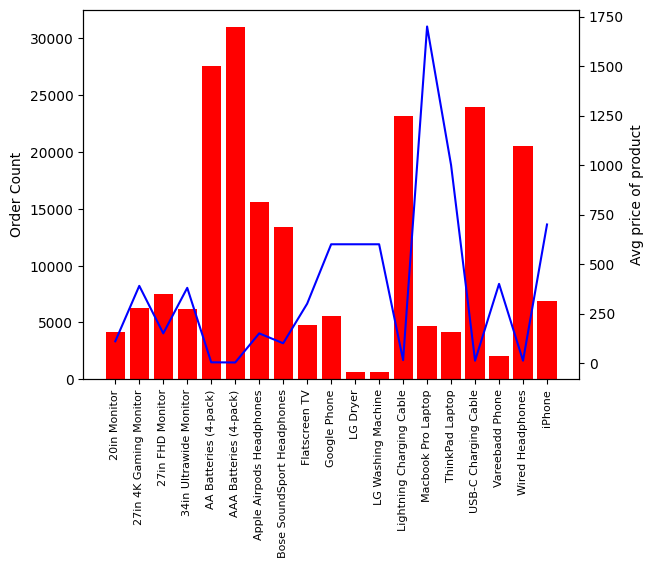

In [138]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(count_df['Product'], count_df['Quantity Ordered'], color = 'red')
ax2.plot(count_df['Product'], count_df['Price Each'], color = 'blue')
ax1.set_xticklabels(products, rotation = 'vertical', fontsize = 8)
ax1.set_ylabel('Order Count')
ax2.set_ylabel('Avg price of product')
plt.show()


In [143]:
all_data['Product'].value_counts()[0:5].index

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object', name='Product')

In [145]:
most_sold_product = all_data['Product'].value_counts()[0:5].index
most_sold_product

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object', name='Product')

In [146]:
filter2 = all_data['Product'].isin(most_sold_product)

In [148]:
most_sold_product_df = all_data[filter2]

In [149]:
most_sold_product_df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [154]:
#use size to display the grouping and then unstack to display the pivot equivalent
pivot = most_sold_product_df.groupby(['Month', 'Product']).size().unstack()

<Axes: xlabel='Month'>

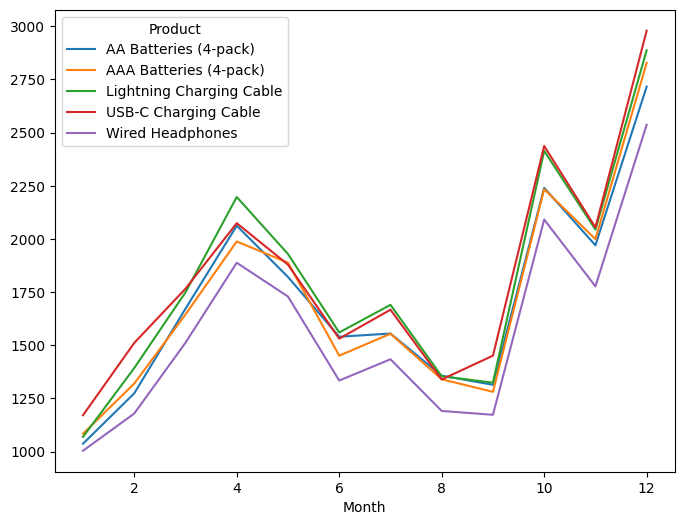

In [155]:
pivot.plot(figsize=(8,6))

In [156]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City'],
      dtype='object')

In [157]:
all_data['Order ID']

0         176558
2         176559
3         176560
4         176560
5         176561
           ...  
186845    259353
186846    259354
186847    259355
186848    259356
186849    259357
Name: Order ID, Length: 185686, dtype: object

In [160]:
filter3 = all_data['Order ID'].duplicated(keep = False)

In [162]:
df_duplicated = all_data[filter3]

In [163]:
df_duplicated

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco
...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco


In [167]:
dup_products = df_duplicated.groupby(['Order ID'])['Product'].apply(lambda x: ','.join(x)).reset_index().rename(columns = {'Product':'grouped_products'})

In [168]:
dup_products

,Order ID,grouped_products
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


In [170]:
dup_products_df = df_duplicated.merge(dup_products, on = 'Order ID' ,how = 'left')

In [171]:
no_dup_df = dup_products_df.drop_duplicates(subset = ['Order ID'])

In [172]:
no_dup_df.shape

(6879, 10)

<Axes: ylabel='count'>

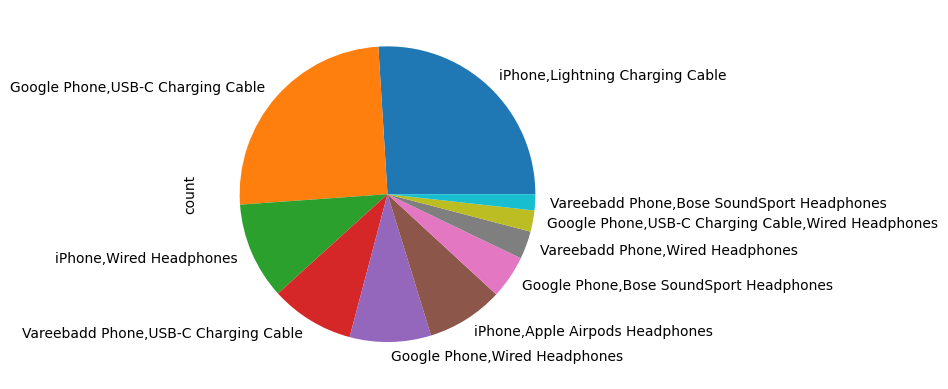

In [179]:
no_dup_df['grouped_products'].value_counts()[0:10].plot(kind= 'pie')